<a href="https://colab.research.google.com/github/megmkoch/IceJamProjectFall2022/blob/main/dataDownloadSentinel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas
!pip install libpysal
!pip install rasterio
!pip install earthpy
!pip install rioxarray
!pip install rasterstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 34.2 MB/s 
     |████████████████████████████████| 16.6 MB 48.3 MB/s 
     |████████████████████████████████| 7.8 MB 49.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 29.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 6.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 22.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 2.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 

In [2]:
import numpy as np
import numpy.ma as ma
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.plot as ep
import os
import rioxarray as rxr

import rasterstats as rs



In [3]:
#attach to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir('/content/drive/MyDrive/IceJamProject2022')

In [5]:
ls

S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0/
S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825/
S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF/
S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B/
S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9/
S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124/
S1AA_20170217T225113_20170313T225113_VVP024_INT80_G_ueF_E9FF/
S1AA_20170313T225113_20170325T225113_VVP012_INT80_G_ueF_2115/
S1AA_20171202T225122_20171214T225122_VVP012_INT80_G_ueF_32A3/
S1AA_20171214T225122_20171226T225121_VVP012_INT80_G_ueF_41D2/
S1AA_20171226T225121_20180107T225121_VVP012_INT80_G_ueF_69FF/
S1AA_20180107T225121_20180119T225120_VVP012_INT80_G_ueF_A957/
S1AA_20180119T225120_20180131T225120_VVP012_INT80_G_ueF_6DEE/
S1AA_20180131T225120_20180212T225120_VVP012_INT80_G_ueF_5CCF/
S1AA_20180212T225120_20180308T225120_VVP024_INT80_G_ueF_2586/
S1AA_20180308T225120_20180320T225120_VVP012_INT80_G_ueF_CEFC/
S1AA_201

In [6]:
os.chdir('/content/drive/MyDrive/IceJamProject2022/vertDispMaps')


In [7]:
os.getcwd()



'/content/drive/MyDrive/IceJamProject2022/vertDispMaps'

In [8]:
!ls


outputs
points.cpg
points.dbf
points.prj
points.qmd
points.shp
points.shx
S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0_corr.tif
S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0_vert_disp.tif
S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825_corr.tif
S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825_vert_disp.tif
S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF_corr.tif
S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF_vert_disp.tif
S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B_corr.tif
S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B_vert_disp.tif
S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9_corr.tif
S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9_vert_disp.tif
S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124_corr.tif
S1AA_20170205T225104_20170217T225113_VVP012_INT80_G_ueF_4124_vert_disp.tif
S1AA_20170217T225113_20170313T225113_VVP024_INT80_G_ueF_

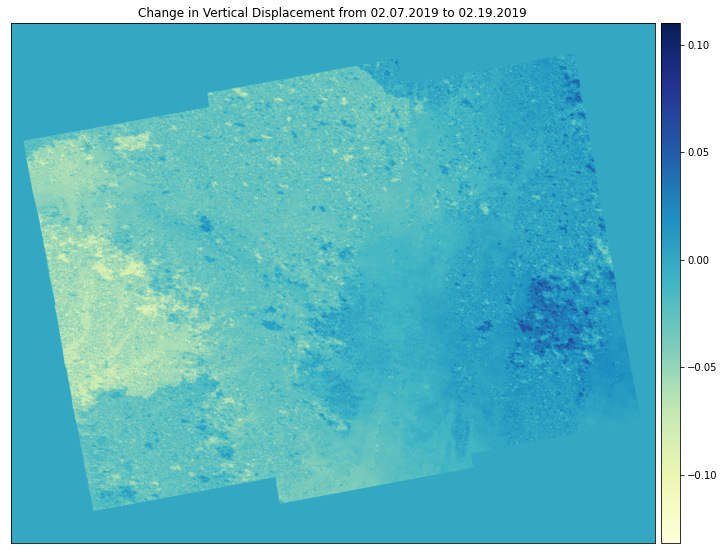

In [9]:
# open and plot vertical displacement map
with rio.open('S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F_vert_disp.tif') as vert_disp_src:
    feb192019 = vert_disp_src.read(1)

ep.plot_bands(feb192019,
              title="Change in Vertical Displacement from 02.07.2019 to 02.19.2019",
              cmap="YlGnBu")

plt.show()


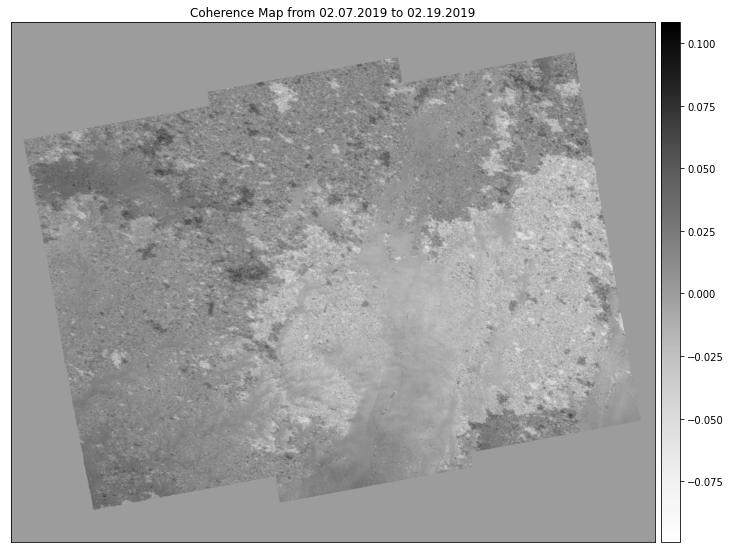

In [10]:
with rio.open('S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F_corr.tif') as coherence_src:
    feb192019_corr = coherence_src.read(1)

ep.plot_bands(feb192019_corr,
              title="Coherence Map from 02.07.2019 to 02.19.2019",
              cmap="Greys")

plt.show()

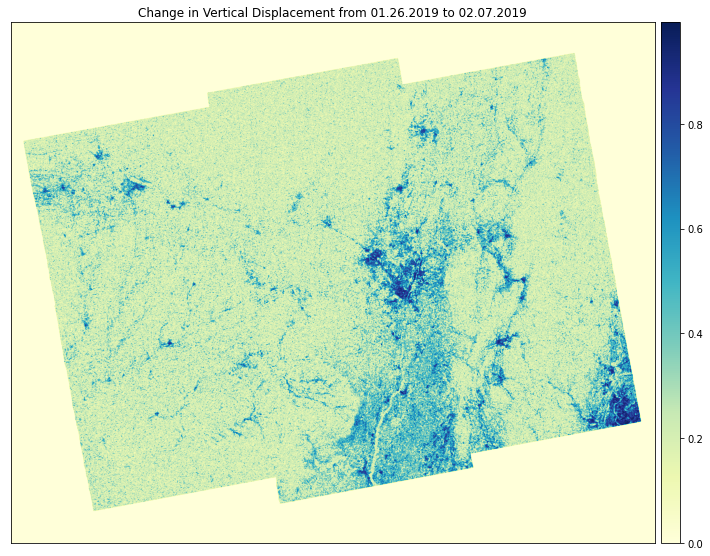

In [11]:
# open and plot vertical displacement map
with rio.open('S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C_vert_disp.tif') as vert_disp_src:
    feb072019 = vert_disp_src.read(1)

ep.plot_bands(feb072019,
              title="Change in Vertical Displacement from 01.26.2019 to 02.07.2019",
              cmap="YlGnBu")

plt.show()

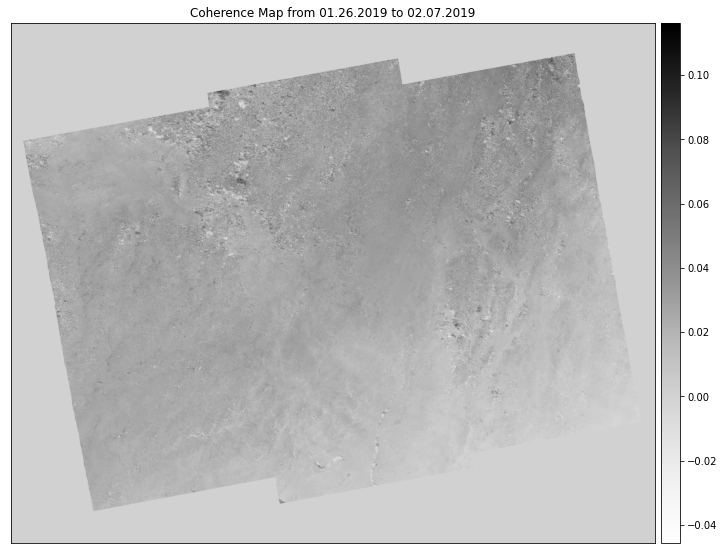

In [12]:
with rio.open('S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C_corr.tif') as coherence_src:
    feb072019_corr = coherence_src.read(1)

ep.plot_bands(feb072019_corr,
              title="Coherence Map from 01.26.2019 to 02.07.2019",
              cmap="Greys")

plt.show()

In [13]:
feb072019.shape

(2941, 3639)

In [14]:
feb072019_corr.shape

(2941, 3639)

In [14]:
os.chdir('/content/drive/MyDrive/IceJamProject2022/vertDispMaps')

In [15]:
stream_polygons = gpd.read_file("streamgagepolygons.shp")

type(stream_polygons)

geopandas.geodataframe.GeoDataFrame

In [22]:
os.chdir('/content/drive/MyDrive/IceJamProject2022/vertDispMaps/')

In [24]:
feb072019_data = rxr.open_rasterio('S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C_vert_disp.tif', masked=True)


In [25]:
feb072019_data.shape

(1, 2941, 3639)

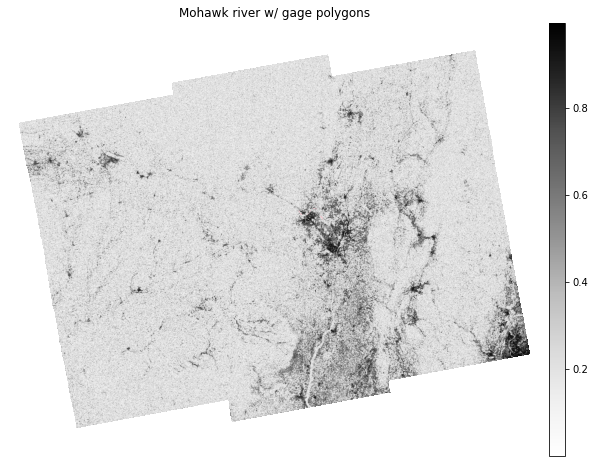

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))

# We plot with the zeros in the data so the CHM can be better represented visually
ep.plot_bands(feb072019_data,
              extent=plotting_extent(feb072019,
                                     feb072019_data.rio.transform()),  # Set spatial extent
              cmap='Greys',
              title="Mohawk river w/ gage polygons 1.26 - 2.07.2019",
              scale=False,
              ax=ax)


stream_polygons.plot(ax=ax,
                       marker=stream_polygons['geometry'],
                       color='pink')

ax.set_axis_off()
plt.show()

In [27]:
os.chdir('/content/drive/MyDrive/IceJamProject2022/vertDispMaps/')

In [28]:
stream_polygons.shape
stream_polygons.head

<bound method NDFrame.head of    id                                           geometry
0   1  POLYGON ((581656.865 4743690.941, 581972.420 4...
1   2  POLYGON ((586240.993 4741632.687, 586380.202 4...
2   3  POLYGON ((589472.113 4744761.232, 589809.146 4...
3   4  POLYGON ((593435.914 4740929.314, 593567.797 4...>

In [29]:
stream_polygons.geometry

0    POLYGON ((581656.865 4743690.941, 581972.420 4...
1    POLYGON ((586240.993 4741632.687, 586380.202 4...
2    POLYGON ((589472.113 4744761.232, 589809.146 4...
3    POLYGON ((593435.914 4740929.314, 593567.797 4...
Name: geometry, dtype: geometry

In [30]:
#Extract zonal stats
feb072019_disp = rs.zonal_stats(stream_polygons,
                                   feb072019_data.values[0,:,:],
                                   nodata=-999,
                                   affine=feb072019_data.rio.transform(),
                                   geojson_out=True,
                                   copy_properties=True,
                                   stats="count min mean max median")



# View object type
print(feb072019_disp)

[{'id': '0', 'type': 'Feature', 'properties': {'id': 1, 'min': 0.008285936899483204, 'max': 0.6571162343025208, 'mean': 0.21210715606922412, 'count': 131, 'median': 0.18213991820812225}, 'geometry': {'type': 'Polygon', 'coordinates': (((581656.8651256063, 4743690.9406088805), (581972.419907602, 4743807.558680488), (582130.1972985999, 4743471.424238796), (582171.3566179906, 4743245.047982148), (582157.6368448604, 4743018.6717254985), (582342.8537821188, 4742723.696603198), (582672.1283372449, 4742346.402842117), (583028.8424386313, 4742113.166698902), (583316.9576743667, 4741879.930555687), (583474.7350653645, 4741619.254866213), (583529.6141578855, 4741337.999517043), (583385.556540018, 4741317.419857347), (582987.6831192406, 4741598.675206518), (582761.3068625914, 4741783.892143776), (582637.8289044192, 4741975.9689676), (582507.4910596819, 4742305.243522725), (582198.7961642512, 4742689.397170372), (581732.3238778226, 4743306.786961234), (581711.7442181272, 4743416.545146275), (58165

In [31]:
#make lists of vertical displacements (mean from zonal stats function) from 02.07.2019
lock8_0207vd = [0.21210715606922412]
rexford_0207vd = [0.43293891319861777]
freemans_0207vd = [0.30677935103295556]
vischer_0207vd = [0.255656182349145]

In [32]:
feb192019_data = rxr.open_rasterio('S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F_vert_disp.tif', masked=False)

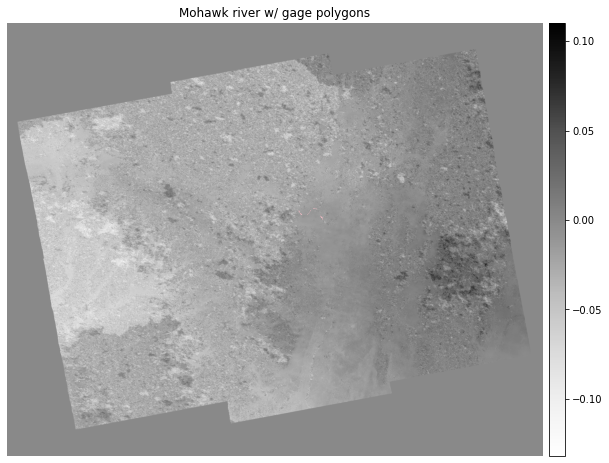

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))

# We plot with the zeros in the data so the CHM can be better represented visually
ep.plot_bands(feb192019_data,
              extent=plotting_extent(feb192019,
                                     feb192019_data.rio.transform()),  # Set spatial extent
              cmap='Greys',
              title="Mohawk river w/ gage polygons 2.07- 2.19.2019",
              scale=False,
              ax=ax)


stream_polygons.plot(ax=ax,
                       marker=stream_polygons['geometry'],
                       color='pink')

ax.set_axis_off()
plt.show()

In [34]:
#Extract zonal stats
feb192019_disp = rs.zonal_stats(stream_polygons,
                                   feb192019_data.values[0,:,:],
                                   nodata=-999,
                                   affine=feb192019_data.rio.transform(),
                                   geojson_out=True,
                                   copy_properties=True,
                                   stats="count min mean max median")



# View object type
print(feb192019_disp)

[{'id': '0', 'type': 'Feature', 'properties': {'id': 1, 'min': -0.04094671830534935, 'max': -0.00043347181053832173, 'mean': -0.016676143835519106, 'count': 131, 'median': -0.01623687893152237}, 'geometry': {'type': 'Polygon', 'coordinates': (((581656.8651256063, 4743690.9406088805), (581972.419907602, 4743807.558680488), (582130.1972985999, 4743471.424238796), (582171.3566179906, 4743245.047982148), (582157.6368448604, 4743018.6717254985), (582342.8537821188, 4742723.696603198), (582672.1283372449, 4742346.402842117), (583028.8424386313, 4742113.166698902), (583316.9576743667, 4741879.930555687), (583474.7350653645, 4741619.254866213), (583529.6141578855, 4741337.999517043), (583385.556540018, 4741317.419857347), (582987.6831192406, 4741598.675206518), (582761.3068625914, 4741783.892143776), (582637.8289044192, 4741975.9689676), (582507.4910596819, 4742305.243522725), (582198.7961642512, 4742689.397170372), (581732.3238778226, 4743306.786961234), (581711.7442181272, 4743416.545146275)

In [35]:
#make lists of vertical displacements (mean from zonal stats function) from 02.19.2019
lock8_0219vd = [-0.016676143835519106]
rexford_0219vd = [-0.01232003432053786]
freemans_0219vd = [-0.01663324362795118]
vischer_0219vd = [-0.01631996514913919]

In [36]:
#Goal Sentinel 1:
#Pandas data frame, 6 columns. Start date, end date, reach1_vertical_disp, reach2_vertical_disp, reach3_vertical_disp, reach4_vertical_disp
start_date = ["2019-01-26", "2019-02-07"]
end_date = ["2019-02-07", "2019-02-19"]
lock8_vertdisp = [lock8_0207vd, lock8_0219vd]
rexford_vertdisp = [rexford_0207vd, rexford_0219vd]
freemans_vertdisp = [freemans_0207vd, freemans_0219vd]
vischer_vertdisp = [vischer_0207vd, vischer_0219vd]


In [37]:
sentinel_vertdisp = pd.DataFrame({'start_date':start_date, 'end_date':end_date, 'lock8_vertdisp': lock8_vertdisp, 'rexford_vertdisp': rexford_vertdisp, 'freemans_vertdisp': freemans_vertdisp, 'vischer_vertdisp': vischer_vertdisp})

In [38]:
print(sentinel_vertdisp)

   start_date    end_date           lock8_vertdisp        rexford_vertdisp  \
0  2019-01-26  2019-02-07    [0.21210715606922412]   [0.43293891319861777]   
1  2019-02-07  2019-02-19  [-0.016676143835519106]  [-0.01232003432053786]   

        freemans_vertdisp        vischer_vertdisp  
0   [0.30677935103295556]     [0.255656182349145]  
1  [-0.01663324362795118]  [-0.01631996514913919]  
